# Download and Plot Earthquakes
### Xiaotao Yang @ Purdue University
This notebook contains examples of compliance corrections using data downloaded from IRIS. The functions for tilt and compliance corrections are saved in a separate file: obsmaster.py.
### References:


## Step 0. Import needed packages.

In [1]:
#import needed packages.
from seisgo import utils
from seisgo import obsmaster as obs
import sys
import time
import scipy
import obspy
import pyasdf
import datetime
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from obspy import UTCDateTime
from obspy.core import Trace
from IPython.display import clear_output
from obspy.clients.fdsn import Client
from obspy.core.event import Catalog
from obspy.geodetics.base import gps2dist_azimuth
try:
    from obspy.core.event import readEvents
except Exception as e:
    from obspy import read_events as readEvents

## Step 1. Get earthquake catalog with the specified date range.
In this example, I only use one day to get the earthquakes. The codes can be modified to work on a broader range of time for earthquake catalog. The earthquake catalog is retrieved from GCMT catalog.

In [2]:
evt_start= '2011-03-05'
evt_end = '2011-03-31'
evlon_min = 141
evlon_max = 143.5
evlat_min = 37
evlat_max = 40
evmag_min = 5.0
evmag_max = 10.0
evdep_min = 0
evdep_max = 100

print('retrieving earthquake catalog, may take a few minutes ...')
cat=Catalog()
t0=time.time()
cat = readEvents('http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/COMBO/combo.ndk')
print('it took '+str(time.time() - t0)+' s to get the catalog')
# cat=readEvents('./gcmtcombo.ndk')
filt1 = 'time >= %s' % evt_start
filt2 = 'time <= %s' % evt_end
cat = cat.filter(filt1, filt2)

filt1 = 'magnitude >= %s' % evmag_min
filt2 = 'magnitude <= %s' % evmag_max
cat = cat.filter(filt1, filt2)

filt1 = 'depth >= %s' % (float(evdep_min)*1000.)
filt2 = 'depth <= %s' % (float(evdep_max)*1000.)
cat = cat.filter(filt1, filt2)

if None not in [evlat_min, evlat_max, evlon_min, evlon_max]:
    filt1 = 'latitude >= %s' % evlat_min
    filt2 = 'latitude <= %s' % evlat_max
    cat = cat.filter(filt1, filt2)

    filt1 = 'longitude >= %s' % evlon_min
    filt2 = 'longitude <= %s' % evlon_max
    cat = cat.filter(filt1, filt2)

#
events=utils.qml_to_event_list(cat)


retrieving earthquake catalog, may take a few minutes ...
it took 222.33445763587952 s to get the catalog


/usr/local/anaconda3/envs/seispy/lib/python3.7/site-packages/obspy/core/util/attribdict.py:97: UserWarning: Setting attribute "preferred_mag" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/usr/local/anaconda3/envs/seispy/lib/python3.7/site-packages/obspy/core/util/attribdict.py:97: UserWarning: Setting attribute "preferred_mag_type" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/usr/local/anaconda3/envs/seispy/lib/python3.7/si

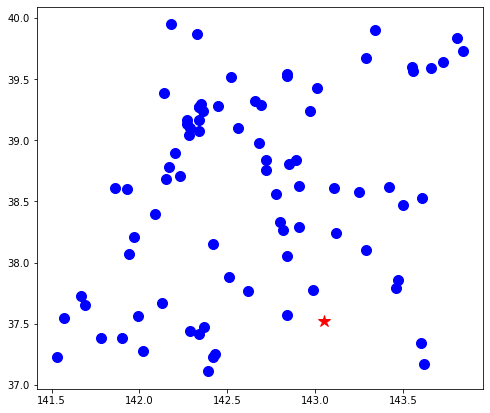

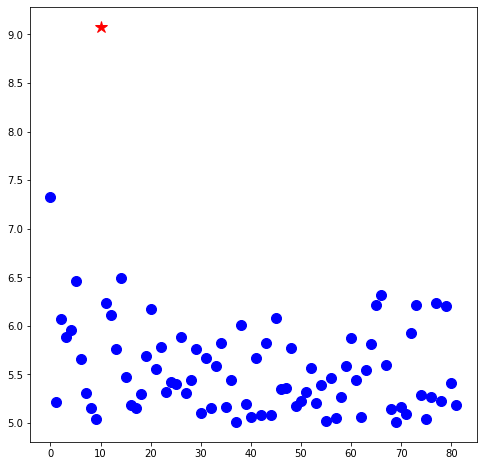

In [12]:
#plotting
plt.figure(figsize=(8, 8))
ax=plt.subplot()
for i in range(len(events)):
    evlon=events[i]['longitude']
    evlat=events[i]['latitude']
    mag=events[i]['magnitude']
    if mag>8:
        plt.plot(evlon,evlat,'*r', markersize=12)
    else:
        plt.plot(evlon,evlat,'ob', markersize=10)

ax.set_aspect(aspect=np.cos(np.mean([evlat_min,evlat_max])))
# plt.savefig(ev['event_id']+'_receivermapwithdata.png')
plt.show()

plt.figure(figsize=(8, 8))
ax=plt.subplot()
for i in range(len(events)):
    mag=events[i]['magnitude']
    if mag>8:
        plt.plot(i,mag,'*r', markersize=12)
    else:
        plt.plot(i,mag,'ob', markersize=10)
# plt.savefig(ev['event_id']+'_receivermapwithdata.png')
plt.show()

In [7]:
print(len(events))

82
